In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("wellbeing_dataset.csv")

In [4]:
df.isnull().values.any()

False

In [5]:
df.head()

,DAILY_STRESS,SOCIAL_NETWORK,ACHIEVEMENT,BMI_RANGE,TODO_COMPLETED,DAILY_STEPS,SLEEP_HOURS,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_HOBBY,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,2,5,2,1,6,5,7,1,4,0,5,36 to 50,Female,609.5
1,3,10,5,2,5,5,8,2,3,2,6,36 to 50,Female,655.6
2,3,10,3,2,2,4,8,2,4,8,3,36 to 50,Female,631.6
3,3,7,2,2,3,5,5,1,5,2,0,51 or more,Female,622.7
4,1,4,2,2,5,5,7,2,8,1,5,51 or more,Female,663.9


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le = LabelEncoder()
df["GENDER"] = le.fit_transform(df["GENDER"])
df.head()

,DAILY_STRESS,SOCIAL_NETWORK,ACHIEVEMENT,BMI_RANGE,TODO_COMPLETED,DAILY_STEPS,SLEEP_HOURS,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_HOBBY,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,2,5,2,1,6,5,7,1,4,0,5,36 to 50,0,609.5
1,3,10,5,2,5,5,8,2,3,2,6,36 to 50,0,655.6
2,3,10,3,2,2,4,8,2,4,8,3,36 to 50,0,631.6
3,3,7,2,2,3,5,5,1,5,2,0,51 or more,0,622.7
4,1,4,2,2,5,5,7,2,8,1,5,51 or more,0,663.9


In [8]:
one_hot = pd.get_dummies(df['AGE'], prefix = 'AGE' )

df_encoded = pd.concat([df, one_hot], axis = 1)

df_encoded = df_encoded.drop('AGE', axis = 1)

In [9]:
df_encoded.head()

,DAILY_STRESS,SOCIAL_NETWORK,ACHIEVEMENT,BMI_RANGE,TODO_COMPLETED,DAILY_STEPS,SLEEP_HOURS,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_HOBBY,WEEKLY_MEDITATION,GENDER,WORK_LIFE_BALANCE_SCORE,AGE_21 to 35,AGE_36 to 50,AGE_51 or more,AGE_Less than 20
0,2,5,2,1,6,5,7,1,4,0,5,0,609.5,0,1,0,0
1,3,10,5,2,5,5,8,2,3,2,6,0,655.6,0,1,0,0
2,3,10,3,2,2,4,8,2,4,8,3,0,631.6,0,1,0,0
3,3,7,2,2,3,5,5,1,5,2,0,0,622.7,0,0,1,0
4,1,4,2,2,5,5,7,2,8,1,5,0,663.9,0,0,1,0


In [10]:
df2 = df_encoded

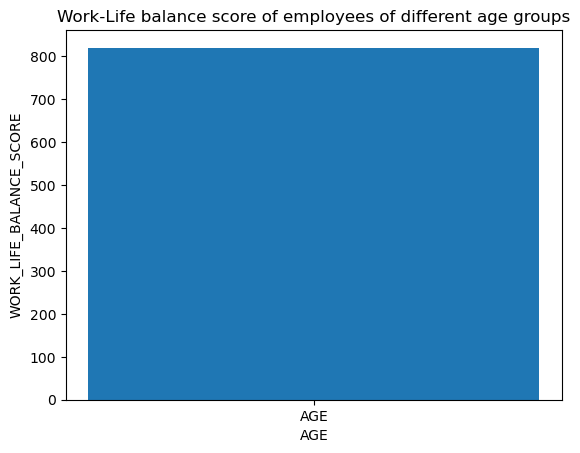

In [11]:
plt.bar("AGE", "WORK_LIFE_BALANCE_SCORE", data = df2)
plt.ylabel("WORK_LIFE_BALANCE_SCORE")
plt.xlabel("AGE")
plt.title("Work-Life balance score of employees of different age groups")
plt.show()

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   DAILY_STRESS             15972 non-null  object 
 1   SOCIAL_NETWORK           15972 non-null  int64  
 2   ACHIEVEMENT              15972 non-null  int64  
 3   BMI_RANGE                15972 non-null  int64  
 4   TODO_COMPLETED           15972 non-null  int64  
 5   DAILY_STEPS              15972 non-null  int64  
 6   SLEEP_HOURS              15972 non-null  int64  
 7   SUFFICIENT_INCOME        15972 non-null  int64  
 8   PERSONAL_AWARDS          15972 non-null  int64  
 9   TIME_FOR_HOBBY           15972 non-null  int64  
 10  WEEKLY_MEDITATION        15972 non-null  int64  
 11  GENDER                   15972 non-null  int32  
 12  WORK_LIFE_BALANCE_SCORE  15972 non-null  float64
 13  AGE_21 to 35             15972 non-null  uint8  
 14  AGE_36 to 50          

In [13]:
df2=df2[df2.DAILY_STRESS!="1/1/2000"]

In [14]:
x = df2.drop(["WORK_LIFE_BALANCE_SCORE"], axis = 1)
y = df2["WORK_LIFE_BALANCE_SCORE"]

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state = 0)

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(x_test)

In [18]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8539241968105654

In [19]:
correlation_matrix = df2.corr()
wlb_correlation = correlation_matrix['WORK_LIFE_BALANCE_SCORE']

In [20]:
wlb_correlation = wlb_correlation.sort_values(ascending = False)

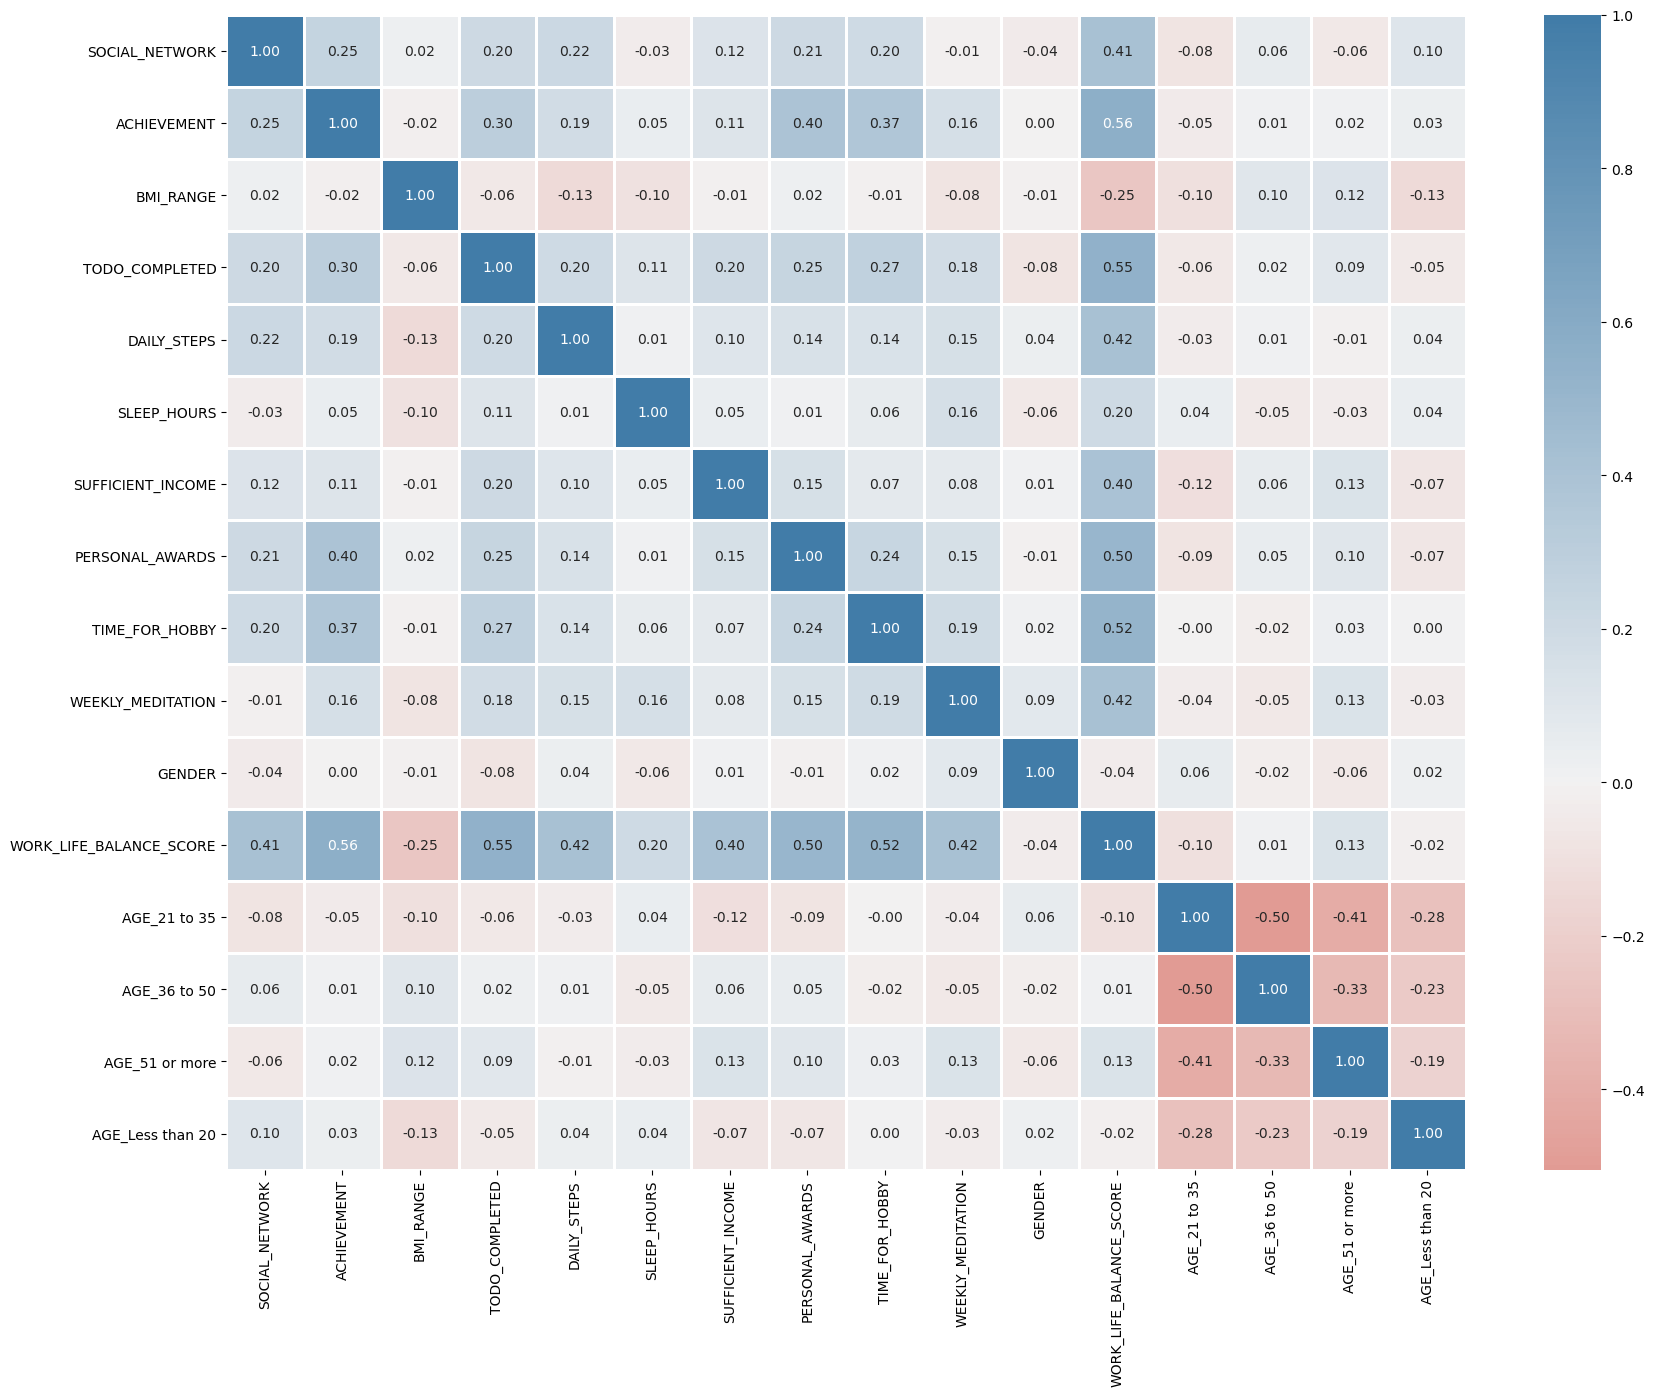

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

"""plt.figure(figsize = (10,16))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')

plt.title('Correlation Matrix')
plt.show()"""




fig_dims = (20,15)
fig, ax = plt.subplots(figsize=fig_dims)


cmap=sns.diverging_palette(h_neg=15,h_pos=240,as_cmap=True)

sns.heatmap(correlation_matrix,center=0,cmap=cmap,linewidths=1,annot=True,fmt='.2f',ax=ax);
plt.show()


In [22]:
correlation_matrix

,SOCIAL_NETWORK,ACHIEVEMENT,BMI_RANGE,TODO_COMPLETED,DAILY_STEPS,SLEEP_HOURS,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_HOBBY,WEEKLY_MEDITATION,GENDER,WORK_LIFE_BALANCE_SCORE,AGE_21 to 35,AGE_36 to 50,AGE_51 or more,AGE_Less than 20
SOCIAL_NETWORK,1.000000,0.249025,0.019843,0.204438,0.215799,-0.029662,0.123638,0.209041,0.200535,-0.006609,-0.041020,0.412580,-0.077058,0.060277,-0.055068,0.102534
ACHIEVEMENT,0.249025,1.000000,-0.019699,0.304972,0.185946,0.045261,0.113779,0.396180,0.368936,0.164713,0.000598,0.561241,-0.045126,0.012539,0.015317,0.031379
BMI_RANGE,0.019843,-0.019699,1.000000,-0.061508,-0.131465,-0.098156,-0.011863,0.019007,-0.006237,-0.078189,-0.010766,-0.252026,-0.104932,0.097905,0.120770,-0.134983
TODO_COMPLETED,0.204438,0.304972,-0.061508,1.000000,0.200432,0.113617,0.203841,0.247069,0.274486,0.182571,-0.081400,0.545503,-0.060966,0.019610,0.089930,-0.050544
DAILY_STEPS,0.215799,0.185946,-0.131465,0.200432,1.000000,0.009218,0.103871,0.142087,0.139918,0.148154,0.037650,0.422981,-0.029807,0.014955,-0.008907,0.035667
SLEEP_HOURS,-0.029662,0.045261,-0.098156,0.113617,0.009218,1.000000,0.045341,0.011512,0.061657,0.163147,-0.058400,0.196420,0.042412,-0.046878,-0.031239,0.042389
SUFFICIENT_INCOME,0.123638,0.113779,-0.011863,0.203841,0.103871,0.045341,1.000000,0.151837,0.072079,0.075713,0.010419,0.403554,-0.115269,0.058818,0.128448,-0.073141
PERSONAL_AWARDS,0.209041,0.396180,0.019007,0.247069,0.142087,0.011512,0.151837,1.000000,0.239230,0.150210,-0.013848,0.504225,-0.085695,0.052445,0.097181,-0.069017
TIME_FOR_HOBBY,0.200535,0.368936,-0.006237,0.274486,0.139918,0.061657,0.072079,0.239230,1.000000,0.191987,0.016590,0.516979,-0.003049,-0.023266,0.027489,0.002564
WEEKLY_MEDITATION,-0.006609,0.164713,-0.078189,0.182571,0.148154,0.163147,0.075713,0.150210,0.191987,1.000000,0.087545,0.416229,-0.038428,-0.053784,0.131126,-0.033059


In [25]:

coefficients_df = pd.DataFrame({'Feature': x.columns, 'Coefficient': model.coef_})
coefficients_df['AbsoluteCoefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='AbsoluteCoefficient', ascending=False)

print(coefficients_df)


              Feature  Coefficient  AbsoluteCoefficient
7   SUFFICIENT_INCOME    21.139655            21.139655
3           BMI_RANGE   -18.146256            18.146256
0        DAILY_STRESS    -5.841473             5.841473
14     AGE_51 or more     5.203570             5.203570
11             GENDER    -5.095766             5.095766
15   AGE_Less than 20    -4.802293             4.802293
9      TIME_FOR_HOBBY     3.405996             3.405996
2         ACHIEVEMENT     3.188213             3.188213
4      TODO_COMPLETED     2.964493             2.964493
8     PERSONAL_AWARDS     2.889278             2.889278
1      SOCIAL_NETWORK     2.841806             2.841806
6         SLEEP_HOURS     2.782592             2.782592
5         DAILY_STEPS     2.665588             2.665588
10  WEEKLY_MEDITATION     2.562456             2.562456
12       AGE_21 to 35    -1.314427             1.314427
13       AGE_36 to 50     0.913150             0.913150
